In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Training Images:", len(X_train))
print("Testing Images:", len(X_test))
print("Shape:", X_train[0].shape)

Training Images: 60000
Testing Images: 10000
Shape: (28, 28)


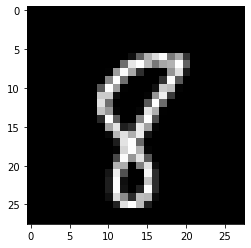

In [ ]:
import random
import matplotlib.pyplot as plt
random_image = random.choice(X_train)
plt.imshow(random_image, cmap="gray")

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
import numpy as np
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Conv2D(filters=10,
                kernel_size=3,
                activation="relu",
                input_shape=(28, 28, 1)),
  
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  
  layers.Conv2D(10, 3, activation="relu"),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(),
  
  layers.Flatten(),
  layers.Dense(10, activation="softmax")
])

In [ ]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=3)
model.evaluate(X_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 15s 4ms/step - loss: 0.2482 - accuracy: 0.9246
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0904 - accuracy: 0.9732
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.9779


[0.06456097960472107, 0.9779000282287598]

In [ ]:
!pip3 install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://google-coral.github.io/py-repo/
     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:  
	f.write(tflite_model)

In [ ]:
import tflite_runtime.interpreter as tflite
interpreter = tflite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

In [ ]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

Prediction: 7


IndexError: ignored

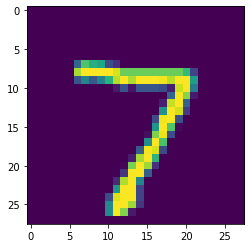

In [ ]:
plt.imshow(X_test[0].reshape(28, 28))
input_data = X_test[0].reshape(-1, 28, 28, 1)
interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_index)
pred = output_data.argmax()
print("Prediction:", pred);
print("Confidence:", output_data[pred]);